In [1]:
import pandas as pd
import numpy as np
# !pip install umap-learn
import umap.umap_ as umap

from matplotlib import pyplot as plt

### Dataset analysis

In [2]:
met_df = (pd.read_csv("./metabolomics/data_zscore_comp_id.csv"))

In [3]:
met_df.head()

,Unnamed: 0,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
0,42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
2,27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
3,38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
4,437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
met_df.shape

(968, 464)

In [5]:
met_df['Unnamed: 0'].unique().shape # unnamed -> unique values, id?

(968,)

In [6]:
comp_df = pd.read_csv("./metabolomics/compAnno.csv")

In [7]:
comp_df.head()

,BIOCHEMICAL,PATHWAY_SORTORDER,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,CHEMICAL_ID,PUBCHEM,CAS,KEGG,HMDB_ID
0,S-1-pyrroline-5-carboxylate,64.0,Amino Acid,Glutamate Metabolism,42370,Pos Early,35,11966181,2906-39-0,C04322,HMDB0001301
1,spermidine,553.0,Amino Acid,Polyamine Metabolism,485,Pos Early,50,1102,124-20-9,C00315,HMDB0001257
2,1-methylnicotinamide,4336.0,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,27665,Pos Early,55,457,1005-24-9,C02918,HMDB0000699
3,"12,13-DiHOME",2048.0,Lipid,"Fatty Acid, Dihydroxy",38395,Neg,62,10236635,263399-35-5,C14829,HMDB0004705
4,5-hydroxyindoleacetate,295.0,Amino Acid,Tryptophan Metabolism,437,Neg,71,1826,54-16-0,C05635,HMDB0000763


comp_df.shape

In [8]:
comp_df['COMP_ID'].unique().shape

(963,)

In [9]:
met_df['Unnamed: 0'].unique().shape

(968,)

In [10]:
# missing ids?
missing_ids = [x for x in list(met_df['Unnamed: 0']) if x not in list(comp_df['COMP_ID'])]
missing_ids

[33967, 38595, 53189, 52896, 52897]

In [11]:
for x in missing_ids:
    print(x, met_df[met_df['Unnamed: 0'] == x].isna().sum(axis=1))

33967 963    463
dtype: int64
38595 964    463
dtype: int64
53189 965    463
dtype: int64
52896 966    463
dtype: int64
52897 967    463
dtype: int64


In [12]:
# rows with all NaN
len([x for x in met_df.isna().sum(axis=1) if x == 463])

8

In [13]:
met_df.set_index('Unnamed: 0', inplace=True)
met_df.index.name = None
met_df.head()

,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,BAYL-09006,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,0.000250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,-0.931552,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,-0.058625,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,-0.778676,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# drop rows with all NaN values
met_df.dropna(axis=0, how='all', inplace=True)

In [15]:
met_df.shape

(960, 463)

In [16]:
# drop rows containing more than 80% NaN values
perc = 0.8
min_count =  int((1 - perc)*met_df.shape[1] + 1)
met_df.dropna(axis=0, thresh=min_count, inplace=True)

In [17]:
met_df.shape

(948, 463)

In [18]:
# fill missing z-scores
met_df.fillna(0, inplace=True)

In [19]:
# features: metabolomics z-scores
# samples: patients
met_df = met_df.T

In [20]:
met_df.shape

(463, 948)

In [21]:
met_df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-08997,-1.259948,-0.610334,-1.201809,-0.954275,0.240999,-0.485987,0.598959,-0.286401,-1.043185,-0.660514,...,-1.094129,-0.419479,0.158619,-0.817640,1.120043,0.045789,0.201601,-0.039255,2.783415,-0.127840
BAYL-08998,0.170557,-0.811169,0.387317,-0.906589,-0.454249,-0.409053,0.612680,-0.315412,-1.095163,0.001887,...,-1.116107,0.000000,-0.424652,0.987125,-0.045571,0.295498,0.409790,-0.195962,1.987574,-0.160196
BAYL-08999,0.814204,-0.554787,-1.062940,4.929942,-0.000406,0.022588,3.050217,2.366699,1.132455,-0.142467,...,0.391963,0.284916,0.020418,-0.129573,-0.090421,0.118741,1.112410,-0.048789,1.794673,-0.226005
BAYL-09000,0.038958,-0.603603,0.525122,0.974496,-0.542391,-0.494779,-0.347355,-0.392808,-0.713237,-0.359097,...,-0.119144,-0.807474,1.317694,0.175748,1.241565,0.113926,-0.978284,-0.653111,0.000000,-0.063945
BAYL-09001,-0.504466,-0.549375,-0.973446,-0.740805,0.000000,-0.049422,-0.787278,-0.598359,-0.781751,-0.515097,...,-0.351091,0.000000,-0.405493,0.000000,0.297091,-0.581249,0.637026,-0.778015,0.829880,-0.017687


In [22]:
clin_df = pd.read_csv("./metabolomics/sampleAttr.csv")

In [23]:
clin_df.head()

,sIDs,sle,BErm,weight,conception,smoking,race,crl,pe,ASA,ptIDs,age,prev.pe,ga.w,consss_batch,ASA_tri_chr,STUDY,Compliance,trimester,height
0,BAYL-08997,0,batch_2023,45.1,7,0,Chinese,55.3,1.0,True,S1_1_Ca,36.64887063655031,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,94.444444,1,150
1,BAYL-08998,0,batch_2023,82.2,7,0,Chinese,63.1,1.0,True,S1_2_Ca,32.309377138945926,2,NaN,batch-2023,ASA - 1st Trimester,CHUK,94.267516,1,171
2,BAYL-08999,0,batch_2023,69.6,7,0,Chinese,58.8,0.0,True,S1_1_Co,43.90143737166324,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,99.367089,1,161
3,BAYL-09000,0,batch_2023,51.4,7,0,Chinese,62.9,0.0,True,S1_2_Co,33.11430527036276,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,98.684211,1,154
4,BAYL-09001,0,batch_2023,39.2,7,0,Chinese,45.3,0.0,True,S1_4_Co,24.32032854209445,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,95.597484,1,161


In [24]:
clin_df.shape

(463, 20)

In [25]:
clin_df.isna().sum()

sIDs              0
sle               0
BErm              0
weight            0
conception        0
smoking           0
race              0
crl               0
pe                0
ASA               0
ptIDs             0
age               0
prev.pe           0
ga.w            463
consss_batch      0
ASA_tri_chr       0
STUDY             0
Compliance        0
trimester         0
height            0
dtype: int64

In [26]:
# ga.w -> all NaN
clin_df.drop(['ga.w'], axis=1, inplace=True)

In [27]:
clin_df.shape

(463, 19)

In [28]:
# [int(x) for x in clin_df['age']]
# invalid literal for int() with base 10: '36.64887063655031'

# [float(x) for x in clin_df['age']]
# could not convert string to float: '30,3'

clin_df['age'] = [float(x.replace(',', '.')) for x in clin_df['age']]

In [29]:
age = np.rint(clin_df.age).sort_values()

In [30]:
age

229    18.0
228    18.0
227    18.0
421    18.0
172    18.0
       ... 
8      44.0
12     44.0
30     44.0
374    45.0
369    46.0
Name: age, Length: 463, dtype: float64

In [31]:
np.bincount(age)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  5,  0,  8,  2,  1,  7, 33, 18, 11, 17, 19, 11, 29, 33, 38, 57,
       37, 24, 29, 15, 16,  5,  5, 12, 16,  0, 13,  1,  1])

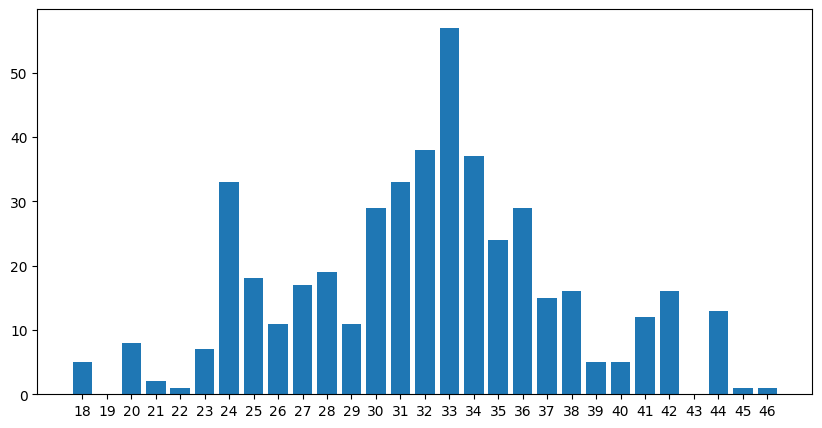

In [32]:
plt.figure(figsize=(10, 5))
plt.bar(range(18, 47), np.bincount(age)[18:])
plt.xticks(range(18, 47))
plt.show()

In [33]:
age.quantile(0.25)

28.0

In [34]:
age.median()

32.0

In [35]:
age.quantile(0.75)

35.0

### batch effect correction

In [36]:
batches = list(clin_df["STUDY"].unique())
batches_dict = {k:v for v, k in enumerate(batches)}
batches_dict

{'CHUK': 0, 'ASPRE_LR': 1, 'ASPRE_HR': 2, 'from-2015': 3}

In [37]:
umap_model = umap.UMAP()
umap_result = umap_model.fit_transform(met_df)

In [38]:
# !pip install seaborn
import seaborn as sns

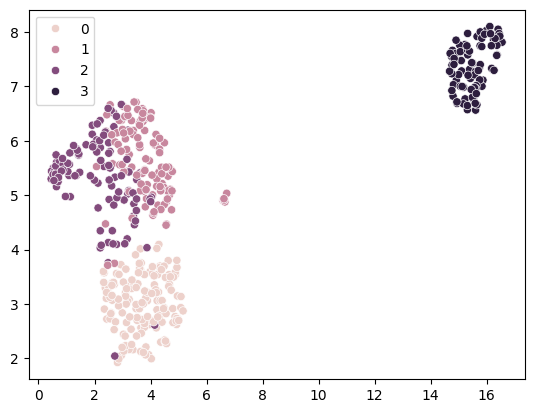

In [39]:
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches_dict[x]).values)
plt.show()

In [40]:
# !pip install combat
from combat.pycombat import pycombat

In [41]:
met_df_corrected = pycombat(met_df.T, clin_df['STUDY'].values).T

Found 4 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


/home/lucija/.local/lib/python3.10/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


In [42]:
umap_result_corrected = umap_model.fit_transform(met_df_corrected)

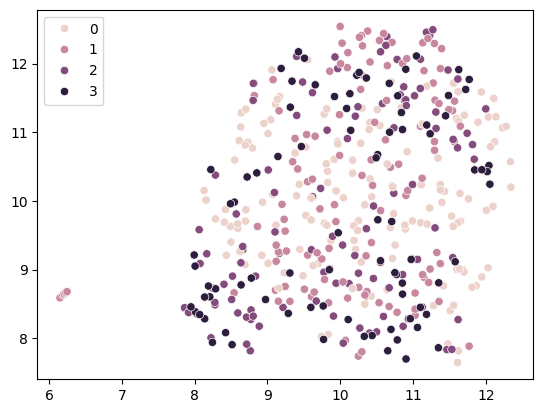

In [43]:
sns.scatterplot(x=umap_result_corrected[:, 0], y=umap_result_corrected[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches_dict[x]).values)
plt.show()

In [44]:
# TODO: analyse outliers

In [45]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [46]:
outliers = find_outliers_IQR(pd.DataFrame(umap_result_corrected)).dropna(how='all')
outliers

,0,1
17,6.197425,NaN
163,6.151693,NaN
222,6.191206,NaN
225,6.215501,NaN
255,6.207756,NaN
293,6.229216,NaN
362,6.248850,NaN


In [47]:
outliers = outliers.index

In [48]:
[x[0] for i, x in enumerate(umap_result_corrected) if i in outliers]

[6.1974254, 6.151693, 6.1912065, 6.2155013, 6.2077556, 6.229216, 6.2488503]

In [49]:
[x[1] for i, x in enumerate(umap_result_corrected) if i in outliers]

[8.62983, 8.588083, 8.630439, 8.64693, 8.647197, 8.665544, 8.677387]

In [50]:
met_df_corrected.iloc[outliers]

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-09015,0.116498,0.383105,-0.360268,-0.463560,6.005495,4.367434,-1.694316,-0.689994,-0.512699,-0.901225,...,-0.166551,-0.106908,-0.639404,0.050890,-0.294085,0.396847,-0.657205,-0.432585,0.152489,-0.483516
BAYL-09161,0.522531,0.383105,0.082822,2.941358,0.690321,2.215887,0.247275,-0.321594,0.083705,0.164495,...,-0.165977,-0.106908,0.648035,0.050890,-0.140734,-0.118689,0.644181,0.164672,-0.428638,-0.551160
BAYL-09222,0.365699,0.383105,-0.431740,2.222691,1.752334,2.074243,-0.848717,-0.406086,-1.023829,-0.249435,...,-0.583404,-0.660069,-0.927951,0.050890,-0.136997,-0.522755,-0.014385,0.640155,0.152489,1.236648
BAYL-09225,0.550184,0.383105,-0.052851,-0.254190,1.753995,2.184723,-0.312599,0.175049,-0.560846,0.164495,...,0.103102,-0.106908,-0.699502,-0.580132,-0.138700,-0.080302,0.543037,1.681298,-0.016410,-0.506225
BAYL-09256,3.872999,0.383105,0.654252,1.946938,1.537732,0.124361,0.339038,-0.359395,-0.445721,-0.740339,...,-0.587718,0.120313,3.020476,0.050890,0.337144,-0.624513,0.434850,-0.121479,0.146506,-0.326006
BAYL-09296,0.952569,0.383105,-0.103382,1.859083,1.659126,0.381931,-0.512663,-0.349227,-0.136645,-0.623916,...,0.633059,1.484018,0.007291,-0.274105,0.021777,-0.647656,0.330725,-0.274728,1.359106,-0.411931
BAYL-09365,0.487793,0.383105,0.413072,0.824734,2.009939,3.263380,-1.082036,0.661877,-0.379400,-0.538346,...,0.405719,-0.550648,0.570457,-1.150586,1.383186,-0.535798,0.932104,0.298594,-0.899023,0.661324


In [51]:
clin_df.iloc[outliers]

,sIDs,sle,BErm,weight,conception,smoking,race,crl,pe,ASA,ptIDs,age,prev.pe,consss_batch,ASA_tri_chr,STUDY,Compliance,trimester,height
17,BAYL-09015,No,batch_2023,60.8,Spontaneous,No,Black,71.6,0.0,False,S2_6,33.1,Multip-no PE,batch-2023,PLACEBO - 2nd Trimester,ASPRE_LR,0.0,2,160.0
163,BAYL-09161,No,batch_2023,70.8,Spontaneous,No,Black,63.8,0.0,False,S2_27,35.8,Multip-no PE,batch-2023,PLACEBO - 2nd Trimester,ASPRE_LR,0.0,2,162.0
222,BAYL-09222,No,batch_2023,65.0,Spontaneous,No,Black,73.0,0.0,False,S2_1,30.0,Multip-no PE,batch-2023,PLACEBO - 1st Trimester,ASPRE_LR,0.0,1,165.0
225,BAYL-09225,No,batch_2023,91.0,Spontaneous,No,Black,76.9,0.0,False,S2_2,31.4,Nullip,batch-2023,PLACEBO - 2nd Trimester,ASPRE_LR,0.0,2,176.0
255,BAYL-09256,No,batch_2023,64.0,Spontaneous,No,Black,74.3,0.0,False,S2_3,31.0,Nullip,batch-2023,PLACEBO - 2nd Trimester,ASPRE_LR,0.0,2,163.4
293,BAYL-09296,No,batch_2023,69.0,Spontaneous,No,White,48.3,0.0,False,S2_30,31.2,Nullip,batch-2023,PLACEBO - 2nd Trimester,ASPRE_LR,0.0,2,173.0
362,BAYL-09365,No,batch_2023,59.0,Spontaneous,No,White,64.5,0.0,False,S2_32,32.6,Nullip,batch-2023,PLACEBO - 2nd Trimester,ASPRE_LR,0.0,2,165.0


In [52]:
# FIX: uporediti vrednosti sa ostalim vrednostima...

In [53]:
clin_df['age'].mean()

32.02567562972786

In [54]:
stats = met_df_corrected.drop(met_df_corrected.iloc[outliers].index, axis=0).describe()

In [55]:
(met_df_corrected.iloc[outliers] - stats.loc['mean']).T.max()

BAYL-09015    6.156105
BAYL-09161    5.858073
BAYL-09222    4.740809
BAYL-09225    7.059204
BAYL-09256    7.732188
BAYL-09296    5.450692
BAYL-09365    8.056359
dtype: float64

In [56]:
(met_df_corrected.iloc[outliers] - stats.loc['mean']).T.idxmax()

BAYL-09015    46142
BAYL-09161    22185
BAYL-09222    32489
BAYL-09225    40008
BAYL-09256    15681
BAYL-09296     1494
BAYL-09365    19324
dtype: int64

In [57]:
stats.loc['max'][19324]

4.177228307758046

In [58]:
stats.loc['mean'][19324]

0.1927136992474594

In [59]:
# drop outliers
met_df_corrected.drop(met_df_corrected.iloc[outliers].index, axis=0, inplace=True)

#### selecting patients who do not take aspirin

In [60]:
met_df_corrected.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-08997,-1.146044,-0.963613,-0.919117,-0.762660,0.465701,-0.320001,0.233840,-0.532667,-1.168056,-0.883133,...,-0.964491,-0.431870,-0.018127,-0.782722,0.726292,-0.162880,0.073752,0.280983,2.018124,-0.304346
BAYL-08998,0.477460,-1.334107,0.560994,-0.731371,-0.380466,-0.160025,0.244165,-0.555093,-1.230067,0.303362,...,-0.989288,-0.052062,-0.493536,1.048180,-0.247548,0.127745,0.257907,0.127953,1.356468,-0.354117
BAYL-08999,1.207946,-0.861143,-0.789775,3.098316,0.171894,0.737533,2.078369,1.518216,1.427540,0.044795,...,0.712233,0.205910,-0.130771,-0.084690,-0.285019,-0.077975,0.879417,0.271672,1.196092,-0.455349
BAYL-09000,0.328107,-0.951196,0.689346,0.502918,-0.487740,-0.338284,-0.478244,-0.614922,-0.774419,-0.343233,...,0.135561,-0.783174,0.926604,0.225052,0.827820,-0.083578,-0.969927,-0.318468,-0.295987,-0.206059
BAYL-09001,-0.288635,-0.851158,-0.706419,-0.622590,0.172388,0.587794,-0.809278,-0.773815,-0.856158,-0.622660,...,-0.126139,-0.052062,-0.477920,0.046759,0.038737,-0.892661,0.458911,-0.440441,0.393969,-0.134903


In [61]:
met_df_corrected.index

Index(['BAYL-08997', 'BAYL-08998', 'BAYL-08999', 'BAYL-09000', 'BAYL-09001',
       'BAYL-09002', 'BAYL-09003', 'BAYL-09004', 'BAYL-09005', 'BAYL-09006',
       ...
       's_21944', 's_22832', 's_22842', 's_22997', 's_23003', 's_23077',
       's_23123', 's_22787', 's_23294', 's_73385'],
      dtype='object', length=456)

In [62]:
# pe: preeclampsia (1/0)
# ASA: aspirin (True/False)
target = clin_df[['pe', 'ASA']]
target.index = met_df.index
target

,pe,ASA
BAYL-08997,1.0,True
BAYL-08998,1.0,True
BAYL-08999,0.0,True
BAYL-09000,0.0,True
BAYL-09001,0.0,True
...,...,...
s_23077,0.0,False
s_23123,0.0,False
s_22787,0.0,False
s_23294,0.0,False


In [63]:
df = met_df_corrected.join(target)

In [64]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53267,54840,57714,57716,57718,57719,57720,57754,pe,ASA
BAYL-08997,-1.146044,-0.963613,-0.919117,-0.762660,0.465701,-0.320001,0.233840,-0.532667,-1.168056,-0.883133,...,-0.018127,-0.782722,0.726292,-0.162880,0.073752,0.280983,2.018124,-0.304346,1.0,True
BAYL-08998,0.477460,-1.334107,0.560994,-0.731371,-0.380466,-0.160025,0.244165,-0.555093,-1.230067,0.303362,...,-0.493536,1.048180,-0.247548,0.127745,0.257907,0.127953,1.356468,-0.354117,1.0,True
BAYL-08999,1.207946,-0.861143,-0.789775,3.098316,0.171894,0.737533,2.078369,1.518216,1.427540,0.044795,...,-0.130771,-0.084690,-0.285019,-0.077975,0.879417,0.271672,1.196092,-0.455349,0.0,True
BAYL-09000,0.328107,-0.951196,0.689346,0.502918,-0.487740,-0.338284,-0.478244,-0.614922,-0.774419,-0.343233,...,0.926604,0.225052,0.827820,-0.083578,-0.969927,-0.318468,-0.295987,-0.206059,0.0,True
BAYL-09001,-0.288635,-0.851158,-0.706419,-0.622590,0.172388,0.587794,-0.809278,-0.773815,-0.856158,-0.622660,...,-0.477920,0.046759,0.038737,-0.892661,0.458911,-0.440441,0.393969,-0.134903,0.0,True


In [65]:
df = df[df['ASA'] == False].copy(deep=True)

In [66]:
df.shape

(305, 950)

In [67]:
df.drop(['ASA'], axis = 1, inplace=True)

In [68]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53266,53267,54840,57714,57716,57718,57719,57720,57754,pe
BAYL-09014,0.187195,-0.411608,-0.201654,-0.086973,-0.309109,-0.203433,-0.713625,-0.778418,-1.113101,-0.866871,...,-0.106908,-1.411424,0.302590,-0.360792,-0.172929,-0.611234,-0.480311,-0.812788,-0.482809,0.0
BAYL-09016,0.328494,-0.351793,0.032687,0.278353,-0.466042,0.347924,-0.919203,-0.611164,-0.401548,-0.738094,...,-0.106908,-0.399493,0.050890,-0.130459,0.353794,-0.724256,0.272478,0.152489,0.023825,0.0
BAYL-09017,0.372754,0.223826,-0.084264,0.468975,-0.299095,0.116690,0.917165,-0.641642,-0.458021,-0.464570,...,-0.106908,-0.905314,0.050890,-0.527920,0.345362,0.399237,0.137705,0.152489,-0.399870,0.0
BAYL-09018,0.103126,0.523683,-0.238103,-1.071461,-0.336122,0.168030,0.032885,0.054229,0.430654,-0.579905,...,-0.403598,-0.138321,0.050890,-0.435343,1.017162,1.103591,0.000695,0.152489,-0.308875,0.0
BAYL-09019,-0.321200,0.231904,0.220926,-1.083531,0.267938,0.074257,0.248712,-0.216594,0.708339,-0.176621,...,-0.106908,-0.903452,0.172755,-0.356219,1.024855,-0.043238,-0.142566,0.152489,-0.407672,0.0


In [69]:
target = df['pe']
df.drop(['pe'], axis=1, inplace=True)
target

BAYL-09014    0.0
BAYL-09016    0.0
BAYL-09017    0.0
BAYL-09018    0.0
BAYL-09019    0.0
             ... 
s_23077       0.0
s_23123       0.0
s_22787       0.0
s_23294       0.0
s_73385       1.0
Name: pe, Length: 305, dtype: float64

In [70]:
np.bincount(target)

array([208,  97])

In [71]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-09014,0.187195,-0.411608,-0.201654,-0.086973,-0.309109,-0.203433,-0.713625,-0.778418,-1.113101,-0.866871,...,-0.143234,-0.106908,-1.411424,0.302590,-0.360792,-0.172929,-0.611234,-0.480311,-0.812788,-0.482809
BAYL-09016,0.328494,-0.351793,0.032687,0.278353,-0.466042,0.347924,-0.919203,-0.611164,-0.401548,-0.738094,...,0.077473,-0.106908,-0.399493,0.050890,-0.130459,0.353794,-0.724256,0.272478,0.152489,0.023825
BAYL-09017,0.372754,0.223826,-0.084264,0.468975,-0.299095,0.116690,0.917165,-0.641642,-0.458021,-0.464570,...,1.807032,-0.106908,-0.905314,0.050890,-0.527920,0.345362,0.399237,0.137705,0.152489,-0.399870
BAYL-09018,0.103126,0.523683,-0.238103,-1.071461,-0.336122,0.168030,0.032885,0.054229,0.430654,-0.579905,...,-0.358738,-0.403598,-0.138321,0.050890,-0.435343,1.017162,1.103591,0.000695,0.152489,-0.308875
BAYL-09019,-0.321200,0.231904,0.220926,-1.083531,0.267938,0.074257,0.248712,-0.216594,0.708339,-0.176621,...,1.249983,-0.106908,-0.903452,0.172755,-0.356219,1.024855,-0.043238,-0.142566,0.152489,-0.407672


In [72]:
df

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-09014,0.187195,-0.411608,-0.201654,-0.086973,-0.309109,-0.203433,-0.713625,-0.778418,-1.113101,-0.866871,...,-0.143234,-0.106908,-1.411424,0.302590,-0.360792,-0.172929,-0.611234,-0.480311,-0.812788,-0.482809
BAYL-09016,0.328494,-0.351793,0.032687,0.278353,-0.466042,0.347924,-0.919203,-0.611164,-0.401548,-0.738094,...,0.077473,-0.106908,-0.399493,0.050890,-0.130459,0.353794,-0.724256,0.272478,0.152489,0.023825
BAYL-09017,0.372754,0.223826,-0.084264,0.468975,-0.299095,0.116690,0.917165,-0.641642,-0.458021,-0.464570,...,1.807032,-0.106908,-0.905314,0.050890,-0.527920,0.345362,0.399237,0.137705,0.152489,-0.399870
BAYL-09018,0.103126,0.523683,-0.238103,-1.071461,-0.336122,0.168030,0.032885,0.054229,0.430654,-0.579905,...,-0.358738,-0.403598,-0.138321,0.050890,-0.435343,1.017162,1.103591,0.000695,0.152489,-0.308875
BAYL-09019,-0.321200,0.231904,0.220926,-1.083531,0.267938,0.074257,0.248712,-0.216594,0.708339,-0.176621,...,1.249983,-0.106908,-0.903452,0.172755,-0.356219,1.024855,-0.043238,-0.142566,0.152489,-0.407672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_23077,-0.052360,-0.645759,-0.928460,0.322687,-0.011331,-0.009173,-1.298761,-0.056718,-0.104810,-0.513336,...,-0.736803,-0.663873,-0.115364,0.032251,-0.928072,-0.391278,2.037867,-0.016027,1.079962,-0.623414
s_23123,-0.052360,-0.166949,0.115088,-0.439904,-0.011331,-0.332268,-0.551854,0.175810,-0.489038,-0.477625,...,-0.610517,-0.854820,-0.115364,0.032251,-2.891681,-0.114168,1.405134,-0.016027,1.153829,-0.559394
s_22787,-0.052360,0.534076,-1.303274,-1.122262,-0.011331,0.466516,-1.077055,-0.012729,1.205847,-0.321399,...,-0.012596,-0.725384,-0.115364,0.032251,0.505416,1.012587,-1.602580,-0.016027,-1.581236,-0.520321
s_23294,-0.052360,-0.597626,0.781302,1.685294,-0.011331,-0.980053,-0.276637,0.632209,-0.021027,-0.833430,...,-1.089903,0.229379,-0.115364,0.032251,-0.049360,-0.354491,-0.570818,-0.016027,-0.574198,-0.587279


### Feature selection

In [73]:
# iteritems is deprecated, downgrade pandas....
# !pip install pandas==1.5.3 
from pymrmre import mrmr

In [74]:
# implementing custom scikit-learn compatible estimator for mrmr (wrapper class)
from sklearn.base import BaseEstimator

In [75]:
class MRMR(BaseEstimator):
    def __init__(self, solution_length=1):
        self.solution_length = solution_length
        self.solution = []
        
    def fit(self, X_train, y_train):
        self.solution = mrmr.mrmr_ensemble(features=X_train, targets=pd.DataFrame(y_train), solution_length=self.solution_length, solution_count=1).iloc[0][0]
        return self
        
    def transform(self, X_train):
        return X_train[self.solution]
        

In [76]:
# old solution:
# solutions = mrmr.mrmr_ensemble(features=df, targets=pd.DataFrame(target), solution_length=30, solution_count=10)
# df[solutions.iloc[0][0]]

In [77]:
mrmr_custom = MRMR(solution_length=30)

In [78]:
mrmr_custom.fit(df, target)

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

MRMR(solution_length=30)

In [79]:
df_mrmr_transformed = mrmr_custom.transform(df)

In [80]:
df_mrmr_transformed.head()

,40708,57591,53254,47993,39271,52608,62059,33959,1769,52473,...,19263,48457,2761,48009,39609,46687,46511,49592,40007,45095
BAYL-09014,0.368198,-0.649723,0.133451,-0.490229,-0.425909,0.006980,-1.445462,-1.172990,-0.184244,-0.503781,...,0.052194,-0.360240,-0.223382,-0.873967,-0.602915,-0.604690,-0.286501,-0.033146,-2.424792,-1.069378
BAYL-09016,0.642681,-0.581132,0.133451,-0.434838,-0.417518,1.499696,-1.097334,0.732727,0.577692,0.503939,...,0.327047,0.290194,0.548448,-0.846086,-0.637993,-0.754218,-0.360348,-1.468750,-0.274558,-0.436413
BAYL-09017,0.259352,-0.393785,-0.085648,-0.456946,-0.100010,-0.430597,-0.934958,-0.717127,-0.502690,0.011626,...,0.245958,0.152486,-0.990145,-0.751530,-0.344058,0.185300,-0.199178,-0.873193,-0.051317,-0.524003
BAYL-09018,0.663814,-0.620911,0.146754,-0.487151,-0.035813,1.776304,-0.935897,-0.792685,-0.072844,-0.141565,...,0.359894,0.190815,-0.066881,-0.524852,-0.496174,0.339428,0.009612,-1.499563,-0.274558,0.296151
BAYL-09019,1.224882,-0.051171,-0.075051,-0.424689,-0.038375,0.182343,-1.142501,-0.180411,0.941848,-0.629578,...,0.477756,-0.076300,0.121604,-0.135553,-0.598959,-0.486772,-0.175536,-1.349107,-0.274558,0.396751


### Classification

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

## shape (312, 948)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df, target, stratify=target, test_size=0.2)

In [83]:
X_train.shape

(244, 948)

In [84]:
X_test.shape

(61, 948)

In [85]:
X_proba = pd.DataFrame(X_train, columns=df.columns)

In [86]:
X_proba

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
s_22832,-0.052360,-0.594806,1.566954,-0.827952,-0.011331,0.252706,0.324199,1.088522,-0.105356,-1.111741,...,1.520946,0.197467,-0.115364,0.032251,0.493757,0.709868,-0.180002,-0.016027,-0.131528,-0.578579
BAYL-09271,0.257779,-0.287210,-0.775406,0.046452,-0.242902,0.471830,-0.211807,-0.478759,-0.660983,-0.537721,...,0.036605,-0.015330,-0.199831,0.426967,2.862032,-0.711558,-0.654757,-0.042809,0.227144,-0.419091
BAYL-09244,-0.318722,-0.287210,-0.298410,-0.096300,-0.391238,-0.547694,-1.342640,-0.782423,-0.291372,-0.764628,...,-0.778966,-0.015330,-0.462909,-0.079747,0.167806,-0.637888,-0.563031,-0.290744,-0.836807,-0.568132
s_75281,-0.052360,-1.014890,-1.154619,-1.619822,-0.011331,0.790202,-0.202909,0.192966,-0.653407,0.137744,...,0.150630,-0.077178,1.984652,0.032251,1.772214,0.055891,-0.060621,-0.016027,1.552843,-0.371714
BAYL-09173,-0.648892,-0.251731,-0.379784,2.012266,0.279652,-0.041175,-0.398960,0.139119,-0.003495,-0.231156,...,0.587162,-0.139497,-0.899638,-0.614204,1.124261,-0.469078,-0.387093,-0.461914,-0.508082,-0.422431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BAYL-09130,0.441154,0.227846,-0.593261,-0.893245,-0.309078,0.135275,-1.158907,-0.430607,-0.236062,1.501727,...,0.179632,-0.767932,0.090680,0.050890,-0.399376,0.614515,0.727380,2.092230,-0.104360,-0.467071
s_73820,-0.052360,-0.779300,1.157960,1.679951,-0.011331,-0.385891,-0.193854,0.534239,-0.692055,-0.772195,...,-0.847869,-0.548894,-0.115364,0.032251,-0.047166,0.188659,-0.554043,-0.016027,-0.838599,-0.255761
BAYL-09093,-0.210693,0.825863,2.963604,-1.249142,0.102720,-0.115079,0.671180,0.048557,-0.566489,-0.049973,...,0.450677,-0.106908,0.101980,-0.222815,-0.251733,-0.351744,2.805850,6.308262,-0.477459,-0.422139
BAYL-09157,-0.772577,-0.018660,-0.174847,-0.671417,-0.397487,-0.390383,0.550986,-0.724422,-0.649719,0.164495,...,0.235348,-0.106908,0.101980,0.050890,0.861526,-0.391318,3.580585,-0.136362,3.219823,-0.351244


In [87]:
scaler = StandardScaler()

In [88]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
model = RandomForestClassifier(n_estimators=10, max_depth=20)

In [90]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=10)

In [91]:
y_pred = model.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred)

0.7377049180327869

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83        42
         1.0       0.64      0.37      0.47        19

    accuracy                           0.74        61
   macro avg       0.70      0.64      0.65        61
weighted avg       0.72      0.74      0.71        61



In [94]:
confusion_matrix(y_test, y_pred)

array([[38,  4],
       [12,  7]])

In [95]:
importances = model.feature_importances_

In [96]:
importances.max()

0.043322177875581465

In [97]:
importances.min()

0.0

In [98]:
len([x for x in importances if x == 0])

766

In [99]:
bst = XGBClassifier(n_estimators=10, max_depth=20, learning_rate=1, objective='binary:logistic')

In [100]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
y_pred = bst.predict(X_test)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74        42
         1.0       0.41      0.37      0.39        19

    accuracy                           0.64        61
   macro avg       0.57      0.57      0.57        61
weighted avg       0.63      0.64      0.63        61



In [103]:
confusion_matrix(y_test, y_pred)

array([[32, 10],
       [12,  7]])

## Choosing hyperparameters

In [ ]:
# FIX: low recall
# FIX: model evaluation -> small test dataset

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df, target, stratify=target, test_size=0.2)

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [111]:
pipe = Pipeline([('mrmr', MRMR()), ('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])

In [114]:
params = {
    'mrmr__solution_length' : [40, 60, 80, 100, 120, 140, 160, 180, 200, 220],
    'classifier__n_estimators' : [10, 20],
    'classifier__max_depth' : [10, 20, 30]
}

In [119]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [125]:
grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring=['f1', 'roc_auc'], refit='f1')
grid.fit(X_train, y_train)

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._filters = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._scores = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._causality_list = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:270: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in s

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mrmr', MRMR()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [10, 20, 30],
                         'classifier__n_estimators': [10, 20],
                         'mrmr__solution_length': [40, 60, 80, 100, 120, 140,
                                                   160, 180, 200, 220]},
             refit='f1', scoring=['f1', 'roc_auc'])

In [126]:
grid.best_estimator_

Pipeline(steps=[('mrmr', MRMR(solution_length=140)),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=20))])

In [127]:
grid.best_score_

0.5212353164077302

In [128]:
grid.best_params_

{'classifier__max_depth': 10,
 'classifier__n_estimators': 20,
 'mrmr__solution_length': 140}

In [129]:
y_pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.7049180327868853

In [130]:
confusion_matrix(y_test, y_pred)

array([[36,  6],
       [12,  7]])

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        42
         1.0       0.54      0.37      0.44        19

    accuracy                           0.70        61
   macro avg       0.64      0.61      0.62        61
weighted avg       0.68      0.70      0.69        61



In [145]:
pipe2 = Pipeline([('mrmr', MRMR()), ('scaler', StandardScaler()), ('classifier', XGBClassifier(learning_rate=1, objective='binary:logistic'))])
grid2 = GridSearchCV(pipe2, param_grid=params, cv=5, scoring=['f1', 'roc_auc'], refit='f1')
grid2.fit(X_train, y_train)

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mrmr', MRMR()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__max_depth': [10, 20, 30],
                         'classifier__n_estimators': [10, 20],
                         'mrmr__solution_length': [40, 60, 80, 100, 120, 140,
                                                   160, 180, 200, 220]},
             refit='f1', scoring=['f1', 'roc_auc'])

In [146]:
grid2.best_params_

{'classifier__max_depth': 10,
 'classifier__n_estimators': 20,
 'mrmr__solution_length': 140}

In [147]:
y_pred2 = grid2.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred2)

0.7540983606557377

In [148]:
confusion_matrix(y_test, y_pred2)

array([[33,  9],
       [ 6, 13]])

In [149]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        42
         1.0       0.59      0.68      0.63        19

    accuracy                           0.75        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.77      0.75      0.76        61



In [151]:
from sklearn.metrics import f1_score, auc

In [152]:
f1_score(y_test, y_pred2)

0.6341463414634148